In [1]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
from pandas import DataFrame
import numpy as np
import seaborn as sns
import glob
from sklearn.decomposition import PCA,FastICA,SparsePCA,NMF,MiniBatchSparsePCA,FactorAnalysis
from sklearn.preprocessing import StandardScaler

## Data loading.

In [2]:
folder = glob.glob('C:/Users/deniz/Documents/simul/shapes/*.txt')
data_list = []
for f in folder:
    print(f)
    data_list.append(f)
      
print(data_list)

C:/Users/deniz/Documents/simul/shapes\1.txt
C:/Users/deniz/Documents/simul/shapes\10.txt
C:/Users/deniz/Documents/simul/shapes\11.txt
C:/Users/deniz/Documents/simul/shapes\12.txt
C:/Users/deniz/Documents/simul/shapes\13.txt
C:/Users/deniz/Documents/simul/shapes\14.txt
C:/Users/deniz/Documents/simul/shapes\15.txt
C:/Users/deniz/Documents/simul/shapes\16.txt
C:/Users/deniz/Documents/simul/shapes\17.txt
C:/Users/deniz/Documents/simul/shapes\18.txt
C:/Users/deniz/Documents/simul/shapes\19.txt
C:/Users/deniz/Documents/simul/shapes\2.txt
C:/Users/deniz/Documents/simul/shapes\20.txt
C:/Users/deniz/Documents/simul/shapes\21.txt
C:/Users/deniz/Documents/simul/shapes\22.txt
C:/Users/deniz/Documents/simul/shapes\23.txt
C:/Users/deniz/Documents/simul/shapes\24.txt
C:/Users/deniz/Documents/simul/shapes\25.txt
C:/Users/deniz/Documents/simul/shapes\26.txt
C:/Users/deniz/Documents/simul/shapes\27.txt
C:/Users/deniz/Documents/simul/shapes\28.txt
C:/Users/deniz/Documents/simul/shapes\29.txt
C:/Users/den

In [3]:
data_loaded=pd.DataFrame()
d=0
for i in data_list:
    datat = pd.read_csv(i, sep=" ", header=None)
    q=datat.iloc[1:202,1]
    d+=1
    datat=datat.iloc[1:202,3]
    data_loaded = data_loaded.append(datat)
data_loaded.shape
transposed=data_loaded.T
print(transposed.shape)    
transposed.tail()

(201, 50)


,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
197,2.807469e+006,5.833941e+007,1.566504e+008,2.598934e+008,3.131604e+008,2.801770e+008,1.718530e+008,5.040788e+007,1.061230e+006,8.298056e+007,...,6.800767e+007,4.763210e+007,2.229265e+007,9.827586e+006,4.388905e+007,1.229508e+008,7.249356e+007,3.931937e+007,6.366786e+006,5.591706e+006
198,7.959393e+006,1.888903e+008,2.384633e+008,2.049813e+008,1.048299e+008,1.414972e+007,2.171398e+007,1.601886e+008,3.672821e+008,5.146072e+008,...,1.042429e+008,1.169322e+008,9.475541e+007,6.318222e+007,7.214211e+007,1.386615e+007,2.039332e+007,2.663745e+005,2.348700e+007,9.757818e+007
199,1.420925e+007,1.777268e+008,1.028166e+008,1.685189e+007,1.733244e+007,1.436773e+008,3.230737e+008,4.148171e+008,3.315703e+008,1.349965e+008,...,1.078678e+008,1.508790e+008,1.563491e+008,1.678193e+008,7.561851e+007,1.486770e+008,4.526898e+005,3.203303e+007,1.069299e+008,1.755907e+008
200,1.995392e+007,4.578941e+007,1.110977e+006,7.395695e+007,2.310928e+008,3.318511e+008,2.664126e+008,9.173780e+007,4.082879e+006,1.441210e+008,...,7.652030e+007,1.185550e+008,1.365051e+008,1.799260e+008,5.122471e+007,2.626726e+008,2.823326e+007,9.629864e+007,1.480123e+008,1.260782e+008
201,2.377870e+007,8.584992e+006,1.126718e+008,2.464559e+008,2.553967e+008,1.158735e+008,2.424313e+006,9.823084e+007,3.489084e+008,4.831140e+008,...,3.260586e+007,5.034108e+007,5.899796e+007,8.462841e+007,1.719973e+007,1.411421e+008,7.598928e+007,1.218332e+008,9.529097e+007,2.233860e+007


Due to the first and the last line in the files simulated by bodies (ATSAS,https://www.embl-hamburg.de/biosaxs/software.html)in the previous shell, data in the dataframe was sliced.

In [4]:
col=np.arange(1, 51, 1).astype(str).tolist()
transposed.columns=col
transposed.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,1.754597e+013,8.455231e+015,1.279101e+016,1.883984e+016,2.710509e+016,3.819375e+016,5.282979e+016,7.186828e+016,9.631037e+016,1.273190e+017,...,1.838266e+015,4.096000e+015,8.303766e+015,1.562500e+016,0.000000e+000,4.665600e+016,1.122942e+015,1.989360e+015,3.353086e+015,5.420226e+015
2,1.732668e+013,7.657176e+015,1.141381e+016,1.654740e+016,2.340838e+016,3.239806e+016,4.396899e+016,5.862425e+016,7.691541e+016,9.943924e+016,...,1.723673e+015,3.765371e+015,7.463695e+015,1.369463e+016,0.000000e+000,3.856190e+016,1.067720e+015,1.871529e+015,3.117915e+015,4.976503e+015
3,1.668580e+013,5.645684e+015,8.028988e+015,1.106306e+016,1.481509e+016,1.933048e+016,2.462560e+016,3.068126e+016,3.743737e+016,4.478940e+016,...,1.418038e+015,2.913429e+015,5.382051e+015,9.115866e+015,0.000000e+000,2.121244e+016,9.164543e+014,1.554578e+015,2.497810e+015,3.831579e+015
4,1.566359e+013,3.284078e+015,4.264802e+015,5.312138e+015,6.358410e+015,7.321156e+015,8.110224e+015,8.637274e+015,8.826884e+015,8.628071e+015,...,1.012960e+015,1.862819e+015,3.019142e+015,4.385593e+015,0.000000e+000,6.899582e+015,7.049549e+014,1.127774e+015,1.696790e+015,2.418634e+015
5,1.432291e+013,1.396969e+015,1.530180e+015,1.555930e+015,1.455344e+015,1.231044e+015,9.118868e+014,5.531697e+014,2.313787e+014,3.353589e+013,...,6.156944e+014,9.469584e+014,1.227773e+015,1.345059e+015,0.000000e+000,9.109995e+014,4.790087e+014,6.986270e+014,9.444276e+014,1.189045e+015


In [5]:
df=transposed.set_index(q)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,,,,,,,,,,,,,,,,,,,,,
0.000000e+000,1.754597e+013,8.455231e+015,1.279101e+016,1.883984e+016,2.710509e+016,3.819375e+016,5.282979e+016,7.186828e+016,9.631037e+016,1.273190e+017,...,1.838266e+015,4.096000e+015,8.303766e+015,1.562500e+016,0.000000e+000,4.665600e+016,1.122942e+015,1.989360e+015,3.353086e+015,5.420226e+015
2.500000e-003,1.732668e+013,7.657176e+015,1.141381e+016,1.654740e+016,2.340838e+016,3.239806e+016,4.396899e+016,5.862425e+016,7.691541e+016,9.943924e+016,...,1.723673e+015,3.765371e+015,7.463695e+015,1.369463e+016,0.000000e+000,3.856190e+016,1.067720e+015,1.871529e+015,3.117915e+015,4.976503e+015
5.000000e-003,1.668580e+013,5.645684e+015,8.028988e+015,1.106306e+016,1.481509e+016,1.933048e+016,2.462560e+016,3.068126e+016,3.743737e+016,4.478940e+016,...,1.418038e+015,2.913429e+015,5.382051e+015,9.115866e+015,0.000000e+000,2.121244e+016,9.164543e+014,1.554578e+015,2.497810e+015,3.831579e+015
7.500000e-003,1.566359e+013,3.284078e+015,4.264802e+015,5.312138e+015,6.358410e+015,7.321156e+015,8.110224e+015,8.637274e+015,8.826884e+015,8.628071e+015,...,1.012960e+015,1.862819e+015,3.019142e+015,4.385593e+015,0.000000e+000,6.899582e+015,7.049549e+014,1.127774e+015,1.696790e+015,2.418634e+015
1.000000e-002,1.432291e+013,1.396969e+015,1.530180e+015,1.555930e+015,1.455344e+015,1.231044e+015,9.118868e+014,5.531697e+014,2.313787e+014,3.353589e+013,...,6.156944e+014,9.469584e+014,1.227773e+015,1.345059e+015,0.000000e+000,9.109995e+014,4.790087e+014,6.986270e+014,9.444276e+014,1.189045e+015


In [6]:
df = df.astype(float) 


In [7]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,,,,,,,,,,,,,,,,,,,,,
0.000000e+000,1.754597e+13,8.455231e+15,1.279101e+16,1.883984e+16,2.710509e+16,3.819375e+16,5.282979e+16,7.186828e+16,9.631037e+16,1.273190e+17,...,1.838266e+15,4.096000e+15,8.303766e+15,1.562500e+16,0.0,4.665600e+16,1.122942e+15,1.989360e+15,3.353086e+15,5.420226e+15
2.500000e-003,1.732668e+13,7.657176e+15,1.141381e+16,1.654740e+16,2.340838e+16,3.239806e+16,4.396899e+16,5.862425e+16,7.691541e+16,9.943924e+16,...,1.723673e+15,3.765371e+15,7.463695e+15,1.369463e+16,0.0,3.856190e+16,1.067720e+15,1.871529e+15,3.117915e+15,4.976503e+15
5.000000e-003,1.668580e+13,5.645684e+15,8.028988e+15,1.106306e+16,1.481509e+16,1.933048e+16,2.462560e+16,3.068126e+16,3.743737e+16,4.478940e+16,...,1.418038e+15,2.913429e+15,5.382051e+15,9.115866e+15,0.0,2.121244e+16,9.164543e+14,1.554578e+15,2.497810e+15,3.831579e+15
7.500000e-003,1.566359e+13,3.284078e+15,4.264802e+15,5.312138e+15,6.358410e+15,7.321156e+15,8.110224e+15,8.637274e+15,8.826884e+15,8.628071e+15,...,1.012960e+15,1.862819e+15,3.019142e+15,4.385593e+15,0.0,6.899582e+15,7.049549e+14,1.127774e+15,1.696790e+15,2.418634e+15
1.000000e-002,1.432291e+13,1.396969e+15,1.530180e+15,1.555930e+15,1.455344e+15,1.231044e+15,9.118868e+14,5.531697e+14,2.313787e+14,3.353589e+13,...,6.156944e+14,9.469584e+14,1.227773e+15,1.345059e+15,0.0,9.109995e+14,4.790087e+14,6.986270e+14,9.444276e+14,1.189045e+15


SAXS data from spherical form-factor is plotted. In the smaller q-region  (~0.1-0.3 A^-1)there is a visible difference between curves, while periodical behaviour in the bigger q-range is very similar.

Text(0, 0.5, 'I [arb.units]')

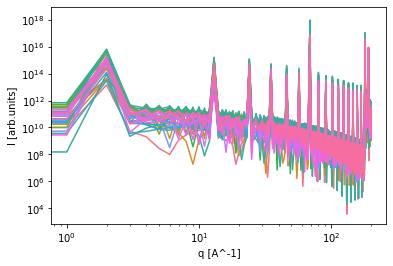

In [8]:
df_sphere=df.copy()
df_sphere=df_sphere.iloc[:,:31]
ax = sns.lineplot(data=df_sphere,dashes=False,legend=False)
ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel("q [A^-1]")
plt.ylabel("I [arb.units]")

## Application of PCA on the data.

In [9]:
transposed=transposed.astype(float)
x = transposed.loc[:, col].values
x.shape

(201, 50)

In [10]:
x = StandardScaler().fit_transform(x)

In [11]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
x.shape

(201, 50)

In [12]:
print('explained variance ratio : %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio : [8.78806416e-01 8.21345692e-02 2.00006401e-02 1.47559994e-02
 3.14821695e-03 8.32976914e-04]


In [13]:
loadings=pca.components_



In [14]:
x=loadings[0,:]
y=loadings[1,:]
z=loadings[2,:]
m=loadings[3,:]
l=loadings[4,:]
n=loadings[5,:]
loadings_df = pd.DataFrame()
loadings_x = pd.Series(x)
loadings_y = pd.Series(y)
loadings_z = pd.Series(z)
loadings_m = pd.Series(m)
loadings_l = pd.Series(l)
loadings_n = pd.Series(n)
loadings_df = loadings_df.assign(PC1=loadings_x)
loadings_df = loadings_df.assign(PC2=loadings_y)
loadings_df = loadings_df.assign(PC3=loadings_z)
loadings_df = loadings_df.assign(PC4=loadings_m)
loadings_df = loadings_df.assign(PC5=loadings_l)
loadings_df = loadings_df.assign(PC6=loadings_n)
feat1=np.array(col).astype(int)
loadings_df = loadings_df.assign(number=feat1)
print (loadings_df)
loadings_df.shape

         PC1       PC2       PC3       PC4       PC5       PC6  number
0   0.124125  0.257908 -0.006074 -0.250277 -0.080520 -0.174404       1
1   0.149597  0.005267  0.004690  0.143500 -0.072104  0.073227       2
2   0.149664 -0.016530  0.004038  0.130966 -0.103495  0.017753       3
3   0.149512 -0.036446  0.003293  0.114060 -0.124418 -0.035807       4
4   0.149183 -0.054577  0.002493  0.094099 -0.135544 -0.082648       5
5   0.148711 -0.071036  0.001665  0.072150 -0.137967 -0.119908       6
6   0.148126 -0.085946  0.000831  0.049060 -0.132962 -0.146255       7
7   0.147450 -0.099426  0.000006  0.025490 -0.121841 -0.161462       8
8   0.146703 -0.111597 -0.000797  0.001945 -0.105853 -0.166052       9
9   0.145900 -0.122572 -0.001570 -0.021198 -0.086135 -0.161020      10
10  0.145055 -0.132458 -0.002307 -0.043663 -0.063686 -0.147614      11
11  0.131177  0.233804 -0.002055 -0.146003  0.092236 -0.223044      12
12  0.144178 -0.141354 -0.003006 -0.065259 -0.039361 -0.127185      13
13  0.

(50, 7)

In [15]:
loadings_df['form-factor']=''

for index, row in loadings_df.iterrows():
    
    if row['number']>0 and row['number']<31:
        loadings_df.loc[index,'form-factor']='Sphere' 
    elif row['number']>30 and row['number']<41:
        loadings_df.loc[index,'form-factor']='Cylinder' 
    else:
        loadings_df.loc[index,'form-factor']='Parallelepiped'
    
print(loadings_df.head())  

        PC1       PC2       PC3       PC4       PC5       PC6  number  \
0  0.124125  0.257908 -0.006074 -0.250277 -0.080520 -0.174404       1   
1  0.149597  0.005267  0.004690  0.143500 -0.072104  0.073227       2   
2  0.149664 -0.016530  0.004038  0.130966 -0.103495  0.017753       3   
3  0.149512 -0.036446  0.003293  0.114060 -0.124418 -0.035807       4   
4  0.149183 -0.054577  0.002493  0.094099 -0.135544 -0.082648       5   

  form-factor  
0      Sphere  
1      Sphere  
2      Sphere  
3      Sphere  
4      Sphere  


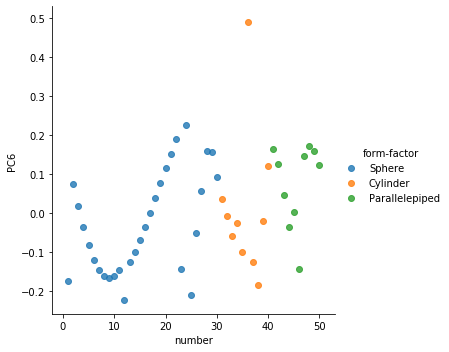

In [16]:
sns.lmplot(x='number',y='PC6',data=loadings_df,fit_reg=False,hue='form-factor')

In [17]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 
                          'principal component 4','principal component 5','principal component 6'])


pc_q=pd.Series(q)
principalDf = principalDf.assign(q=pc_q)
principalDf.set_index(q, inplace=True)
position = list(map(str,range(8,76)))
principalDf = principalDf.drop('q', 1)


principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
1,,,,,,
0.000000e+000,64.474377,-11.953295,-0.168644,-3.843677,1.238411,0.581103
2.500000e-003,53.194598,-2.685906,0.049276,1.557756,-1.149031,-0.738705
5.000000e-003,33.026055,10.404869,0.261513,6.247874,-1.911373,-0.567568
7.500000e-003,19.045946,13.907145,0.158722,2.781161,1.075671,1.153993
1.000000e-002,11.107884,12.247913,-0.008403,-1.640563,2.300546,0.672956


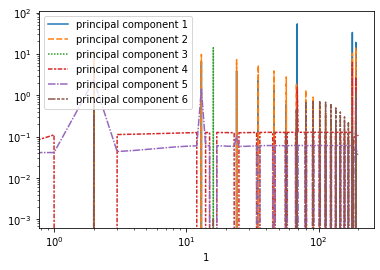

In [18]:
ax = sns.lineplot(data=principalDf)
ax.set_xscale("log")
ax.set_yscale("log")

## Outlook.

PCA on this data didn't peform well. One cannot separate different form-factors, using loading scores. Principal components are also not giving useful information.
This method performs better when comparing experimental data with only subtle differences between objects or data from similar objects affected by noise. 
PCA is not the best approach to classify data with curvature, therefore I will try Naive Bayes, Random Forest, Gradient Boosting and Support Vector Machine as possible tools.